In [1]:
!pip install transformers -q
!pip install sentencepiece -q

     |████████████████████████████████| 2.9 MB 5.4 MB/s 
     |████████████████████████████████| 3.3 MB 37.0 MB/s 
     |████████████████████████████████| 895 kB 34.2 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 636 kB 49.3 MB/s 
     |████████████████████████████████| 109 kB 49.2 MB/s 
     |████████████████████████████████| 546 kB 48.0 MB/s 
     |████████████████████████████████| 1.2 MB 5.4 MB/s 


In [2]:
import pandas as pd

import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from bert_finetuner import *

In [3]:
data = pd.read_json('/content/drive/MyDrive/song_lyric_map.json')
#data = pd.read_json('https://raw.githubusercontent.com/pradeep-miriyala/multi-modal-bert-models/main/data/song_lyric_map.json?token=ADXRNFRS46PTRG46WUZLXHDBKH7HY')

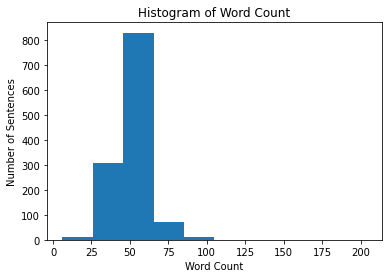

In [4]:
plot_histogram(data['Lyric'])

##### From the histogram, it is evident that most of the sentences have 50 words and some have 75. Although there are sentences with 100 words, the perecentage is very minimal. Hence maximum sequence length is considered as 75.

In [7]:
MAX_SEQ_LEN = 75
gpu, cpu = get_devices()

In [5]:
chk_point = 'xlm-roberta-base'
base_model, tokenizer = load_bert_model(chk_point)

Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

In [8]:
sequences, attention_masks, targets = process_data_w_base_model(data, tokenizer, max_seq_len=MAX_SEQ_LEN)

In [9]:
txt_results = k_fold_model_preparation(base_model, gpu, data, sequences, attention_masks, targets, fusion=False,
                                       k_folds=2, epochs=15, balance_classes=True, dropout_level=0.25, lr=5e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=4, clip_at=1.0)

Running Text Only Classification
FOLD 0
--------------------------------
Class Weights : [1.55555556 0.73684211]
Epoch 1 / 15
Training Model
Evaluating
Losses - Train : 0.694 / Validation : 0.693
Epoch 2 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Evaluating
Losses - Train : 0.696 / Validation : 0.693
Epoch 3 / 15
Training Model
Evaluating
Losses - Train : 0.694 / Validation : 1.464
Epoch 4 / 15
Training Model
Evaluating
Losses - Train : 0.672 / Validation : 0.614
Epoch 5 / 15
Training Model
Evaluating
Losses - Train : 0.614 / Validation : 0.557
Epoch 6 / 15
Training Model
Evaluating
Losses - Train : 0.575 / Validation : 0.540
Epoch 7 / 15
Training Model
Evaluating
Losses - Train : 0.572 / Validation : 0.482
Epoch 8 / 15
Training Model
Evaluating
Losses - Train : 0.535 / Validation : 0.471
Epoch 9 / 15
Training Model
Evaluating
Losses - Train : 0.521 / Validation : 0.614
Epoch 10 / 15
Training Model
Evaluating
Losses - Train : 0.577 / Validation : 0.588
Epoch 11 / 15
Training Model
Evaluating
Losses - Train : 0.546 / Validation : 0.530
Epoch 12 / 15
Training Model
Evaluating
Losses - Train : 0.493 / Validation : 0.523
Epoch 13 / 15
Training Model
Evaluating
Losses - Train : 0.524 / Validation : 0.552
Epoch 14 / 15
Training Model

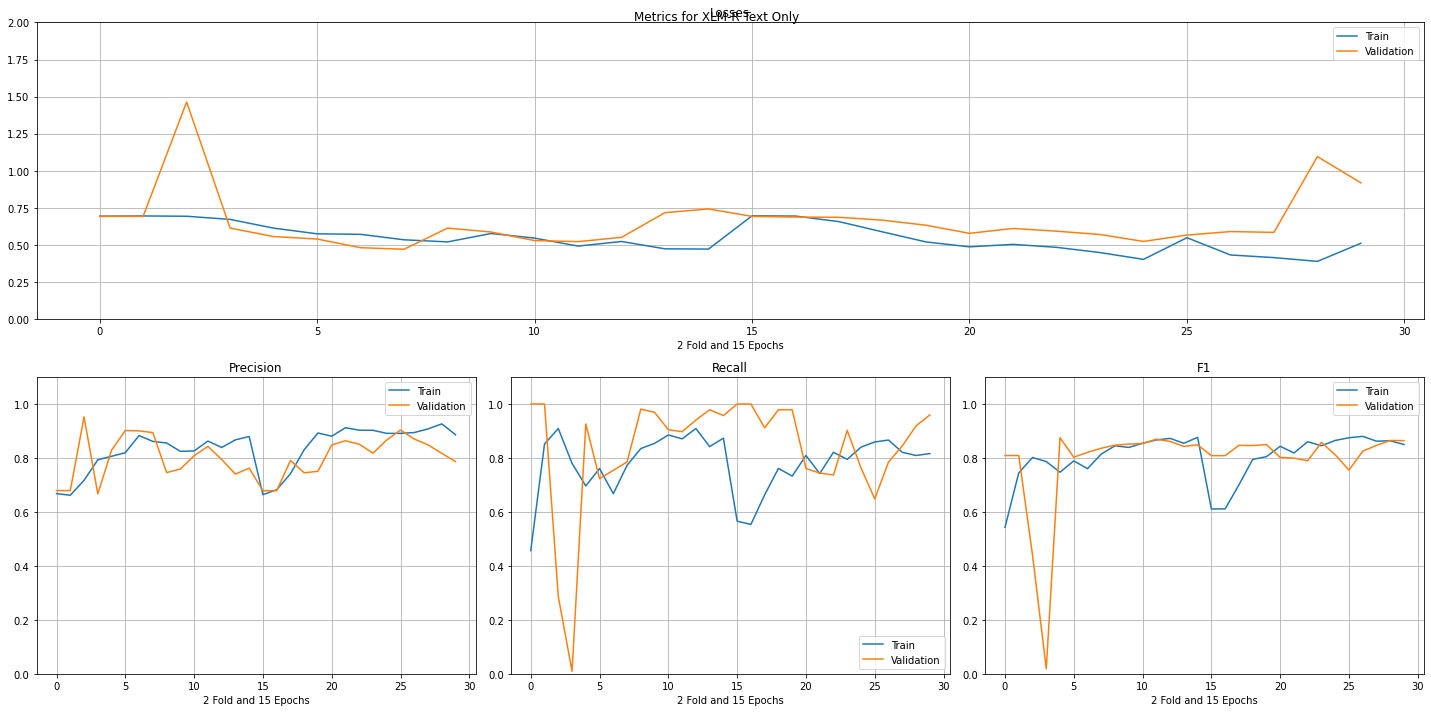

In [10]:
plot_results(txt_results,'XLM-R Text Only')

In [11]:
fusion_results = k_fold_model_preparation(base_model, gpu, data, sequences, attention_masks, targets, fusion=True,
                                       k_folds=2, epochs=15, balance_classes=True, dropout_level=0.25, lr=5e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=4, clip_at=1.0)

Running Fusion Model
FOLD 0
--------------------------------
Class Weights : [1.55555556 0.73684211]
Epoch 1 / 15
Training Model
Evaluating
Losses - Train : 0.692 / Validation : 0.691
Epoch 2 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Evaluating
Losses - Train : 0.690 / Validation : 0.689
Epoch 3 / 15
Training Model
Evaluating
Losses - Train : 0.676 / Validation : 0.584
Epoch 4 / 15
Training Model
Evaluating
Losses - Train : 0.650 / Validation : 0.671
Epoch 5 / 15
Training Model
Evaluating
Losses - Train : 0.625 / Validation : 0.557
Epoch 6 / 15
Training Model
Evaluating
Losses - Train : 0.622 / Validation : 0.706
Epoch 7 / 15
Training Model
Evaluating
Losses - Train : 0.604 / Validation : 0.522
Epoch 8 / 15
Training Model
Evaluating
Losses - Train : 0.637 / Validation : 0.665
Epoch 9 / 15
Training Model
Evaluating
Losses - Train : 0.587 / Validation : 0.536
Epoch 10 / 15
Training Model
Evaluating
Losses - Train : 0.568 / Validation : 0.514
Epoch 11 / 15
Training Model
Evaluating
Losses - Train : 0.598 / Validation : 0.548
Epoch 12 / 15
Training Model
Evaluating
Losses - Train : 0.542 / Validation : 0.489
Epoch 13 / 15
Training Model
Evaluating
Losses - Train : 0.570 / Validation : 0.519
Epoch 14 / 15
Training Model

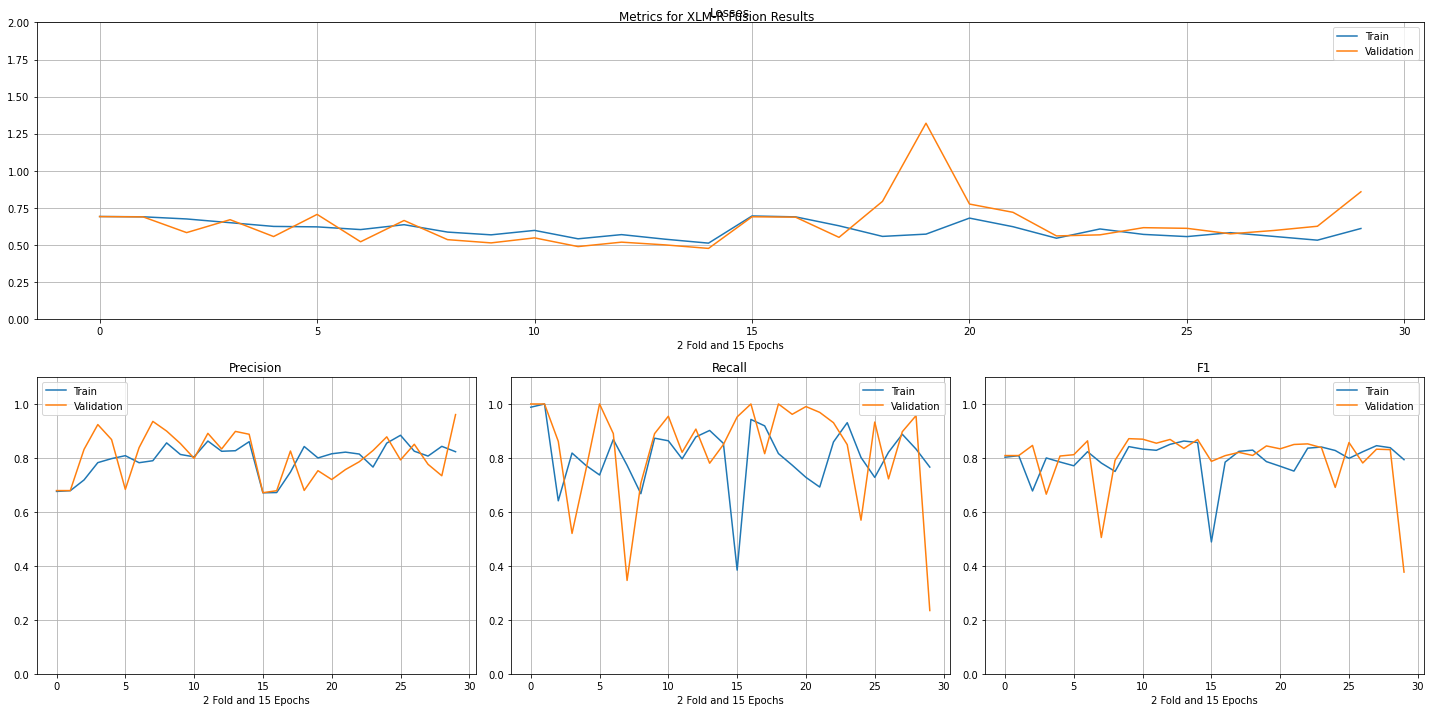

In [12]:
plot_results(fusion_results,'XLM-R Fusion Results')